# Module 2 - Homework

This jupyter notebook contains the homework assigned to this module

In [2]:
# Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset

In this homework, we will use the Laptops price dataset from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
```

The goal of this homework is to create a regression model for predicting the prices (column `'Final Price'`).

In [3]:
# get the data
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-06 12:35:14--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.1s    

2024-10-06 12:35:15 (2.14 MB/s) - ‘laptops.csv’ saved [298573/298573]



### Preparing the dataset 

First, we'll normalize the names of the columns:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Now, instead of `'Final Price'`, we have `'final_price'`.

Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`

In [4]:
df = pd.read_csv('./laptops.csv')

In [5]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [7]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [8]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [9]:
len(df)

2160

In [106]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

### EDA

* Look at the `final_price` variable. Does it have a long tail? 


<Axes: xlabel='final_price', ylabel='Count'>

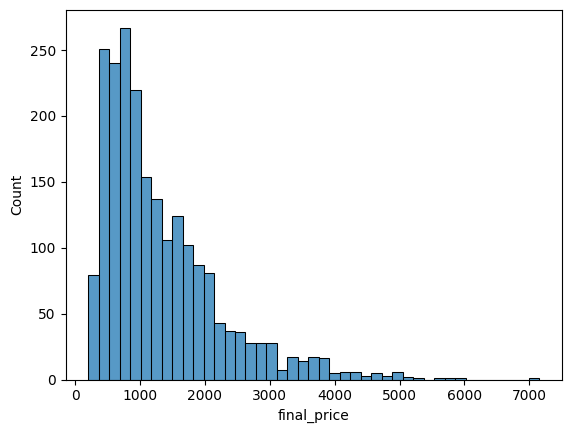

In [10]:
sns.histplot(df.final_price)

Yes the final_price data has a long tail, lets see what happens if we work with the logarithmic value

<Axes: xlabel='final_price', ylabel='Count'>

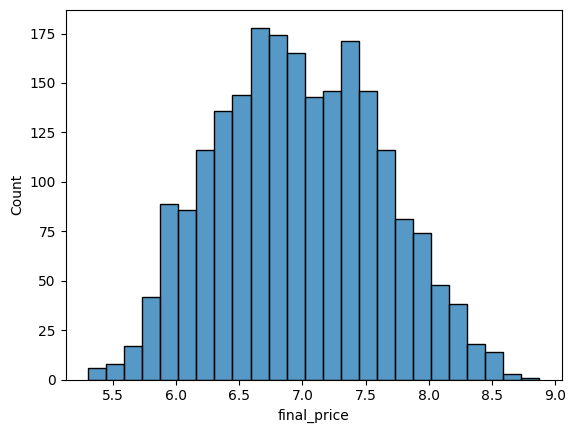

In [11]:
sns.histplot(np.log(df.final_price))

### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`

In [12]:
df.isnull().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

### **Answer 1**

Among those columns, only **screen** has missing values

### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [13]:
df.ram.median()

16.0

### **Answer 2**

The median for variable ram is **16**

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [17]:
# first we get the number of records each dataset must have considering the 60-20-20 distribution
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_val, n_test, n_train, n_val + n_test + n_train)

2160 432 432 1296 2160


In [18]:
# then we create an arange with the indexes
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx


array([2079,  668, 2073, ..., 1130, 1294,  860])

In [19]:
# now that we have a shuffled index we can create the three datasets

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# just to test the resulting length
len(df_train), len(df_val), len(df_test)


(1296, 432, 432)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

The columns for Q1 are: 
- ram
- storage
- screen
- final_price

In [24]:
# get the base columns
base = ['ram', 'storage', 'screen']

In [26]:
df_train[base].isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

As screen is the variable that has null values, lets fill it with 0 and then with the mean value

In [107]:
# X with filling null values with 0
X_train_0 = df_train[base].fillna(0).values

In [108]:
# X with filling null values with mean value
X_train_mean = df_train[base].fillna(df.screen.mean()).values

In [109]:
X_train_0.shape, X_train_mean.shape

((1296, 3), (1296, 3))

In [110]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values

In [111]:
y_train.shape, y_val.shape

((1296,), (432,))

In [112]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [113]:
def rmse(y, y_pred):
    se = (y_pred - y) ** 2
    mse = np.mean(se)
    return np.sqrt(mse)

In [114]:
# Lets train with 0 filled null values
w0, w = train_linear_regression(X_train_0, y_train)
y_pred = w0 + X_train_0.dot(w)
rmse(y_train, y_pred).round(2)

591.38

In [115]:
# Lets train with mean filled null values
w0, w = train_linear_regression(X_train_mean, y_train)
y_pred = w0 + X_train_mean.dot(w)
rmse(y_train, y_pred).round(2)

591.38

In [116]:
# X with filling null values with 0
X_val_0 = df_val[base].fillna(0).values

# X with filling null values with mean
X_val_mean = df_val[base].fillna(df_train.screen.mean()).values

In [117]:
y_pred_0 = w0 + X_val_0.dot(w)
y_pred_mean = w0 + X_val_mean.dot(w)

In [118]:
rmse(y_val, y_pred_0).round(2), rmse(y_val, y_pred_mean).round(2)

(575.95, 575.75)

### **Answer 3**
Both were equally good

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [119]:
def train_linear_regression_reg(X, y, r=0.01):     # we define an updated version of the linear regression training method
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [122]:
r_values = [0, 0.01, 1, 10, 100]

for r in r_values:
    w0, w = train_linear_regression_reg(X_train_0, y_train, r)
    y_pred = w0 + X_val_0.dot(w)
    print(r, rmse(y_val, y_pred).round(3))

0 576.102
0.01 576.103
1 576.3
10 578.1
100 580.888


### **Answer 4**

The smalles RMSE is obtained when r=0

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [123]:
# for thise lets create a functions that returns the dataframes
def get_datasets(df, seed):
    n = len(df)
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    return df_train, df_val, df_test




In [124]:
def prepare_X_y(df):
    df = df.copy()
    df_num = df[base]
    df_num = df_num.fillna(0)
    y_num = df.final_price.values
    return df_num.values, y_num

In [125]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for s in seeds:
    df_train, df_val, df_test = get_datasets(df, s)
    X_train, y_train = prepare_X_y(df_train)
    X_val, y_val = prepare_X_y(df_val)

    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    scores.append(rmse(y_val, y_pred))

scores

[565.4520868771029,
 636.7985423056726,
 588.9558697907963,
 597.8148920012524,
 571.9627915111026,
 573.2383256618942,
 647.3438328407226,
 550.4398184485947,
 587.3335036169905,
 576.1017929433099]

In [126]:
np.std(scores).round(3)

29.176

### **Answer 5**

The std deviation is 29.176

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [127]:
df_train, df_val, df_test = get_datasets(df, 9)

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [130]:
X_full_train, y_full_train = prepare_X_y(df_full_train)
X_test, y_test = prepare_X_y(df_test)

In [132]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, 0.001)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred).round(2)

608.61

### **Answer 6**

The RMSE on the test dataset is **608.61**